In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Load the dataset
file_path = 'generated_sales_data.csv'
df = pd.read_csv(file_path)

#check the few rows
df.head()

,Item_ID,Item_Name,Category,Units_Sold,Unit_Price,Sales_Date
0,ID_1,Device,Fashion,98,319.26,2023-01-01
1,ID_2,Apparatus,Electronics,70,399.46,2023-01-02
2,ID_3,Tool,Fashion,86,256.29,2023-01-03
3,ID_4,Apparatus,Home,11,292.68,2023-01-04
4,ID_5,Apparatus,Electronics,16,251.33,2023-01-05


In [4]:
# EDA and Analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Item_ID     100 non-null    object 
 1   Item_Name   100 non-null    object 
 2   Category    100 non-null    object 
 3   Units_Sold  100 non-null    int64  
 4   Unit_Price  100 non-null    float64
 5   Sales_Date  100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [5]:
# Check for missing values
print(df.isnull().sum())

Item_ID       0
Item_Name     0
Category      0
Units_Sold    0
Unit_Price    0
Sales_Date    0
dtype: int64


In [6]:
# Summary statistics
print(df.describe())

       Units_Sold  Unit_Price
count  100.000000   100.00000
mean    48.630000   270.74170
std     30.026808   140.37112
min      1.000000    17.57000
25%     20.750000   154.17500
50%     48.000000   280.37500
75%     73.500000   390.34000
max     99.000000   495.13000


Number of duplicate rows: 0


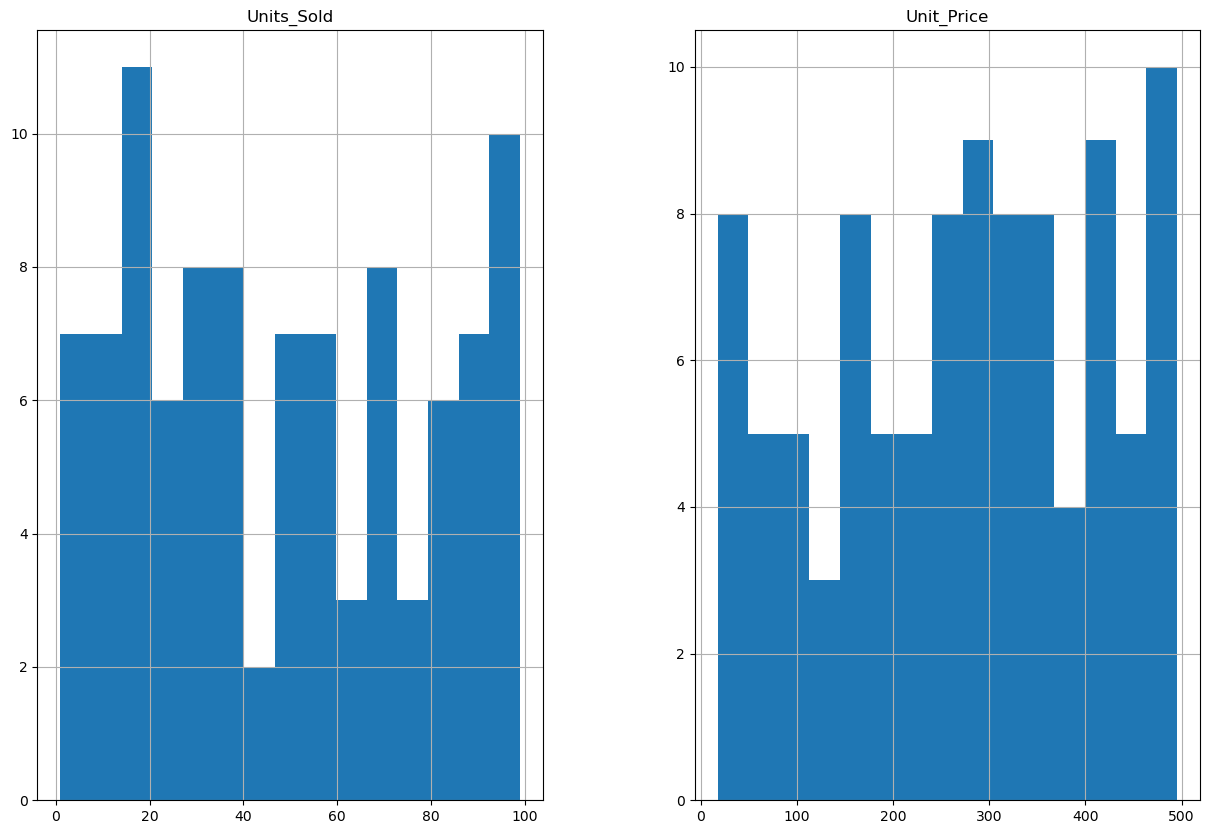

In [7]:
# Check for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Plot histograms for numerical columns
df.hist(bins=15, figsize=(15, 10))
plt.show()

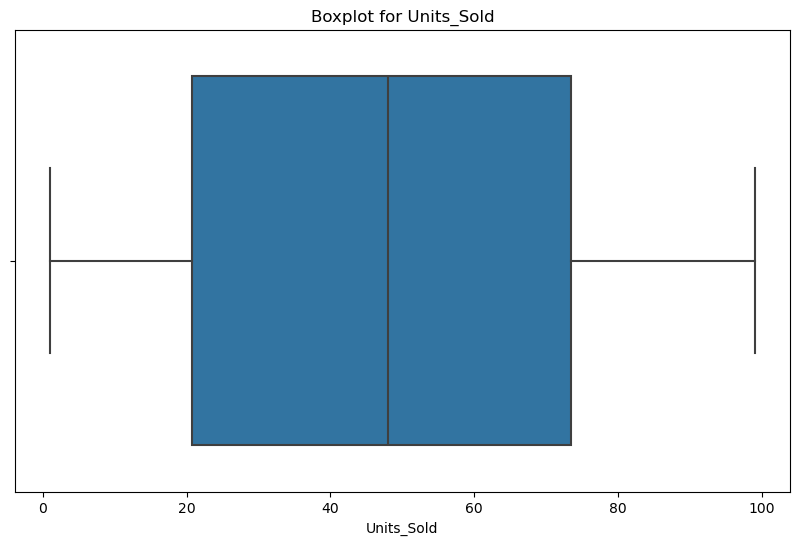

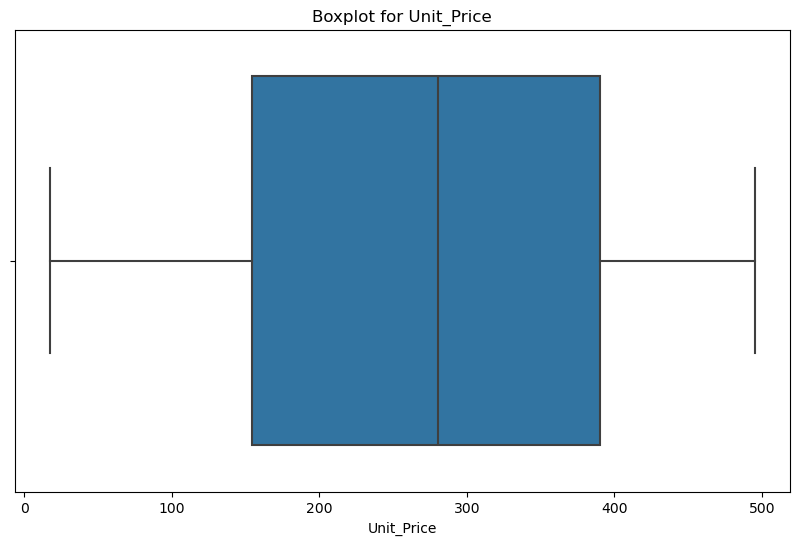

In [8]:
# Boxplots for numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.title(f"Boxplot for {column}")
    plt.show()

In [9]:
# Total sales per item
df['Total_Sales'] = df['Units_Sold'] * df['Unit_Price']
print(df.groupby('Item_Name')['Total_Sales'].sum().sort_values(ascending=False).head())

Item_Name
Device       362336.46
Gadget       340205.29
Apparatus    257018.42
Tool         187879.82
Widget       157154.27
Name: Total_Sales, dtype: float64


In [10]:
# Total sales per category
print(df.groupby('Category')['Total_Sales'].sum().sort_values(ascending=False))

Category
Outdoor        323635.89
Fashion        274014.25
Electronics    262490.38
Home           243597.38
Beauty         200856.36
Name: Total_Sales, dtype: float64


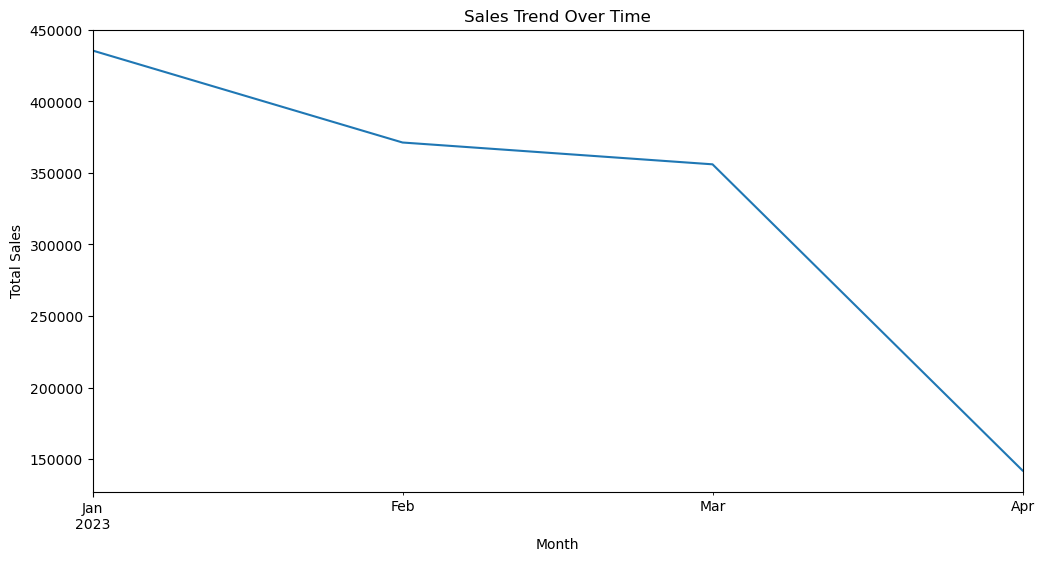

In [11]:
# Sales trend over time
df['Sales_Date'] = pd.to_datetime(df['Sales_Date'])
sales_trend = df.groupby(df['Sales_Date'].dt.to_period("M"))['Total_Sales'].sum()
plt.figure(figsize=(12, 6))
sales_trend.plot()
plt.title("Sales Trend Over Time")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

In [17]:
class SalesDataEDA:
    def __init__(self, file_path):
        """Initialize with the file path of the CSV file."""
        self.df = pd.read_csv(file_path)
        self.df['Sales_Date'] = pd.to_datetime(self.df['Sales_Date'])  # Ensure date column is in datetime format
    
    def basic_info(self):
        """Display basic information about the dataset."""
        print("General Information:")
        print(self.df.info())
        print("\nMissing Values:")
        print(self.df.isnull().sum())
        print("\nSummary Statistics:")
        print(self.df.describe(include='all'))
        print(f"\nNumber of duplicate rows: {self.df.duplicated().sum()}")
    
    def univariate_analysis(self):
        """Generate univariate analysis (Histograms, Count Plots)."""
        # Numerical Columns
        print("\nNumerical Columns Histogram")
        self.df.hist(bins=15, figsize=(15, 10))
        plt.show()

        # Categorical Columns
        categorical_columns = self.df.select_dtypes(include=['object']).columns
        for column in categorical_columns:
            plt.figure(figsize=(10, 6))
            sns.countplot(y=column, data=self.df, order=self.df[column].value_counts().index)
            plt.title(f"Distribution of {column}")
            plt.show()
    
    def correlation_matrix(self):
        """Display the correlation matrix for numerical columns."""
        plt.figure(figsize=(10, 8))
        sns.heatmap(self.df.corr(numeric_only=True), annot=True, cmap='coolwarm')
        plt.title("Correlation Matrix")
        plt.show()
    
    def boxplot_analysis(self):
        """Generate boxplots for numerical columns to detect outliers."""
        numerical_columns = self.df.select_dtypes(include=[np.number]).columns
        for column in numerical_columns:
            plt.figure(figsize=(10, 6))
            sns.boxplot(x=self.df[column])
            plt.title(f"Boxplot for {column}")
            plt.show()
    
    def sales_by_category(self):
        """Analyze total sales by category."""
        self.df['Total_Sales'] = self.df['Units_Sold'] * self.df['Unit_Price']
        total_sales_per_category = self.df.groupby('Category')['Total_Sales'].sum().sort_values(ascending=False)
        print("\nTotal Sales per Category:")
        print(total_sales_per_category)
    
    def sales_by_item(self):
        """Analyze total sales by item."""
        self.df['Total_Sales'] = self.df['Units_Sold'] * self.df['Unit_Price']
        total_sales_per_item = self.df.groupby('Item_Name')['Total_Sales'].sum().sort_values(ascending=False)
        print("\nTotal Sales per Item:")
        print(total_sales_per_item.head())
    
    def sales_trend(self):
        """Analyze the sales trend over time."""
        self.df['Total_Sales'] = self.df['Units_Sold'] * self.df['Unit_Price']
        sales_trend = self.df.groupby(self.df['Sales_Date'].dt.to_period("M"))['Total_Sales'].sum()
        plt.figure(figsize=(12, 6))
        sales_trend.plot()
        plt.title("Sales Trend Over Time")
        plt.xlabel("Month")
        plt.ylabel("Total Sales")
        plt.show()
    
    def sales_by_year_month(self):
        """Analyze sales by year and month."""
        self.df['Year'] = self.df['Sales_Date'].dt.year
        self.df['Month'] = self.df['Sales_Date'].dt.month

        # Yearly Sales
        yearly_sales = self.df.groupby('Year')['Total_Sales'].sum()
        print("\nYearly Sales:")
        print(yearly_sales)

        # Monthly Sales across years
        monthly_sales = self.df.groupby(['Year', 'Month'])['Total_Sales'].sum().unstack()
        plt.figure(figsize=(12, 6))
        sns.heatmap(monthly_sales, annot=True, fmt='.2f', cmap='Blues')
        plt.title("Monthly Sales by Year")
        plt.xlabel("Month")
        plt.ylabel("Year")
        plt.show()
    
    def high_quantity_sales(self, threshold=80):
        """Filter and display sales with quantity above a threshold."""
        high_quantity_sales = self.df[self.df['Units_Sold'] > threshold]
        print(f"\nHigh Quantity Sales (Units Sold > {threshold}):")
        print(high_quantity_sales.head())


In [19]:
sales_analysis =SalesDataEDA(file_path)

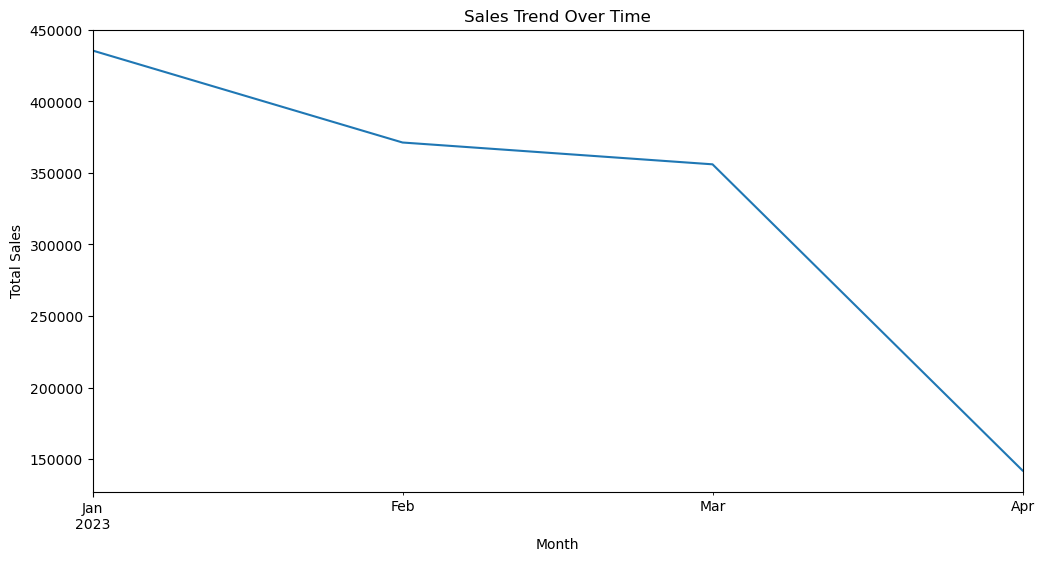

In [21]:
sales_analysis.sales_trend()

In [23]:
class SalesDataEDAWithErrorHandling:
    def __init__(self, file_path):
        """Initialize with the file path of the CSV file and handle errors in loading the file."""
        try:
            self.df = pd.read_csv(file_path)
            self.df['Sales_Date'] = pd.to_datetime(self.df['Sales_Date'], errors='coerce')  # Handle date parsing errors
            print("Data loaded successfully!")
        except FileNotFoundError:
            print(f"Error: The file {file_path} was not found.")
        except pd.errors.EmptyDataError:
            print("Error: The file is empty.")
        except Exception as e:
            print(f"An unexpected error occurred: {str(e)}")
    
    def basic_info(self):
        """Display basic information about the dataset with error handling."""
        try:
            print("General Information:")
            print(self.df.info())
            print("\nMissing Values:")
            print(self.df.isnull().sum())
            print("\nSummary Statistics:")
            print(self.df.describe(include='all'))
            print(f"\nNumber of duplicate rows: {self.df.duplicated().sum()}")
        except AttributeError:
            print("Error: Dataframe is not loaded properly.")
    
    def univariate_analysis(self):
        """Generate univariate analysis (Histograms, Count Plots) with error handling."""
        try:
            # Numerical Columns
            print("\nNumerical Columns Histogram")
            self.df.hist(bins=15, figsize=(15, 10))
            plt.show()

            # Categorical Columns
            categorical_columns = self.df.select_dtypes(include=['object']).columns
            for column in categorical_columns:
                plt.figure(figsize=(10, 6))
                sns.countplot(y=column, data=self.df, order=self.df[column].value_counts().index)
                plt.title(f"Distribution of {column}")
                plt.show()
        except Exception as e:
            print(f"Error in univariate analysis: {str(e)}")
    
    def correlation_matrix(self):
        """Display the correlation matrix for numerical columns with error handling."""
        try:
            plt.figure(figsize=(10, 8))
            sns.heatmap(self.df.corr(numeric_only=True), annot=True, cmap='coolwarm')
            plt.title("Correlation Matrix")
            plt.show()
        except Exception as e:
            print(f"Error in generating correlation matrix: {str(e)}")
    
    def boxplot_analysis(self):
        """Generate boxplots for numerical columns to detect outliers with error handling."""
        try:
            numerical_columns = self.df.select_dtypes(include=[np.number]).columns
            for column in numerical_columns:
                plt.figure(figsize=(10, 6))
                sns.boxplot(x=self.df[column])
                plt.title(f"Boxplot for {column}")
                plt.show()
        except Exception as e:
            print(f"Error in boxplot analysis: {str(e)}")
    
    def sales_by_category(self):
        """Analyze total sales by category with error handling."""
        try:
            self.df['Total_Sales'] = self.df['Units_Sold'] * self.df['Unit_Price']
            total_sales_per_category = self.df.groupby('Category')['Total_Sales'].sum().sort_values(ascending=False)
            print("\nTotal Sales per Category:")
            print(total_sales_per_category)
        except KeyError:
            print("Error: Required columns for analysis are missing.")
        except Exception as e:
            print(f"Error in sales by category analysis: {str(e)}")
    
    def sales_by_item(self):
        """Analyze total sales by item with error handling."""
        try:
            self.df['Total_Sales'] = self.df['Units_Sold'] * self.df['Unit_Price']
            total_sales_per_item = self.df.groupby('Item_Name')['Total_Sales'].sum().sort_values(ascending=False)
            print("\nTotal Sales per Item:")
            print(total_sales_per_item.head())
        except KeyError:
            print("Error: Required columns for analysis are missing.")
        except Exception as e:
            print(f"Error in sales by item analysis: {str(e)}")
    
    def sales_trend(self):
        """Analyze the sales trend over time with error handling."""
        try:
            sales_trend = self.df.groupby(self.df['Sales_Date'].dt.to_period("M"))['Total_Sales'].sum()
            plt.figure(figsize=(12, 6))
            sales_trend.plot()
            plt.title("Sales Trend Over Time")
            plt.xlabel("Month")
            plt.ylabel("Total Sales")
            plt.show()
        except Exception as e:
            print(f"Error in sales trend analysis: {str(e)}")
    
    def sales_by_year_month(self):
        """Analyze sales by year and month with error handling."""
        try:
            self.df['Year'] = self.df['Sales_Date'].dt.year
            self.df['Month'] = self.df['Sales_Date'].dt.month

            # Yearly Sales
            yearly_sales = self.df.groupby('Year')['Total_Sales'].sum()
            print("\nYearly Sales:")
            print(yearly_sales)

            # Monthly Sales across years
            monthly_sales = self.df.groupby(['Year', 'Month'])['Total_Sales'].sum().unstack()
            plt.figure(figsize=(12, 6))
            sns.heatmap(monthly_sales, annot=True, fmt='.2f', cmap='Blues')
            plt.title("Monthly Sales by Year")
            plt.xlabel("Month")
            plt.ylabel("Year")
            plt.show()
        except KeyError:
            print("Error: Required columns for analysis are missing.")
        except Exception as e:
            print(f"Error in sales by year and month analysis: {str(e)}")
    
    def high_quantity_sales(self, threshold=80):
        """Filter and display sales with quantity above a threshold with error handling."""
        try:
            high_quantity_sales = self.df[self.df['Units_Sold'] > threshold]
            print(f"\nHigh Quantity Sales (Units Sold > {threshold}):")
            print(high_quantity_sales.head())
        except Exception as e:
            print(f"Error in filtering high quantity sales: {str(e)}")


In [26]:
file_path1 =pd.read_csv('sales_data1.csv')
file_path1.head()

,ProductID,ProductName,Category,Price,Quantity,Date
0,P0049,Product 49,Clothing,181.18,15,2023-03-26
1,P0017,Product 17,Home & Kitchen,185.38,18,2023-09-06
2,P0062,Product 62,Books,391.95,13,2022-05-07
3,P0068,Product 68,Clothing,125.24,1,2023-06-17
4,P0049,Product 49,Books,181.18,8,2022-08-17


In [28]:
sales_analysis2 =SalesDataEDAWithErrorHandling(file_path1)

An unexpected error occurred: argument of type 'method' is not iterable


In [30]:
sales_analysis2.basic_info()

General Information:
Error: Dataframe is not loaded properly.


In [ ]:
import seaborn as sns

# Load example dataset
tips = sns.load_dataset('tips')



# Create a scatter plot with regression line
sns.lmplot( x = 'total_bill' , y ='tip' , data = tips )
plt.title('Total bill vs Tip')
plt.show()



In [ ]:
tips.info()